<a href="https://colab.research.google.com/github/BlackCurrantDS/DBSE_Project/blob/main/SPMF_algoComparision_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
pip install spmf

In [131]:
from spmf import Spmf
import pathlib

In [132]:
d = '/content/' #specify the folder all the input and output files are
input_filename = "/content/adult_train_transactions_rpgrowth.csv.txt"
data = "Adult"

ECLAT

In [133]:
spmf_eclat = Spmf("Eclat", input_filename=input_filename,
            output_filename="output_eclat", arguments=[0.01],spmf_bin_location_dir=d )

In [134]:
#spmf_eclat.run()

Apriori

In [135]:
spmf_apriori = Spmf("Apriori", input_filename=input_filename,
            output_filename="output_apriori", arguments=[0.01],spmf_bin_location_dir=d )

In [136]:
#spmf_apriori.run()

FP-Growth

In [137]:
spmf_fpgrowth = Spmf("FPGrowth_itemsets", input_filename=input_filename,
            output_filename="output_FP-Growth", arguments=[0.01],spmf_bin_location_dir=d )

In [138]:
#spmf_fpgrowth.run()

RunTime

In [139]:
#Apriori
min_sup = [.01, .02,.03,.04, .05,.06,.07,.08,.09, .1, .2, .5, .6]
import time
run_time_apr = []
for i in min_sup:
    print(i)
    start_time = time.time()
    spmf_apriori = Spmf("Apriori", input_filename=input_filename,
            output_filename=data+"output_apriori"+"_"+str(i), arguments=[i],spmf_bin_location_dir=d )
    spmf_apriori.run()
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_apr.append(time.time() - start_time)
  
run_time_apr

0.01
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 266920
 The algorithm stopped at size 14
 Frequent itemsets count : 248696
 Maximum memory usage : 68.26435852050781 mb
 Total time ~ 179519 ms

For 0--- 179.78141522407532 seconds ---
0.02
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 94621
 The algorithm stopped at size 13
 Frequent itemsets count : 86730
 Maximum memory usage : 31.84912109375 mb
 Total time ~ 63581 ms

For 0--- 63.83476257324219 seconds ---
0.03
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 49290
 The algorithm stopped at size 13
 Frequent itemsets count : 44374
 Maximum memory usage : 35.84814453125 mb
 Total time ~ 43507 ms

For 0--- 43.74833822250366 seconds ---
0.04
>/content/spmf.jar
=============  APRIORI - STATS =============
 Candidates count : 29769
 The algorithm stopped at size 12
 Frequent itemsets count : 26704
 Maximum memory usage : 30.000

[179.7814953327179,
 63.834840059280396,
 43.74837803840637,
 29.6832058429718,
 14.566987037658691,
 11.727226734161377,
 11.120272397994995,
 8.651692152023315,
 7.523810148239136,
 7.402951002120972,
 2.3686864376068115,
 0.9389245510101318,
 0.8894524574279785]

In [140]:
#EClat

import time
run_time_eclat = []
for i in min_sup:
    print(i)
    start_time = time.time()
    spmf_eclat = Spmf("Eclat", input_filename=input_filename,
            output_filename=data+"output_Eclat"+"_"+str(i), arguments=[i],spmf_bin_location_dir=d )
    spmf_eclat.run()
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_eclat.append(time.time() - start_time)
  
run_time_eclat

0.01
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 32561
 Frequent itemsets count : 248696
 Total time ~ 19837 ms
 Maximum memory usage : 318.3427734375 mb

For 0--- 20.423239707946777 seconds ---
0.02
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 32561
 Frequent itemsets count : 86730
 Total time ~ 12471 ms
 Maximum memory usage : 580.1953125 mb

For 0--- 13.138113498687744 seconds ---
0.03
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 32561
 Frequent itemsets count : 44374
 Total time ~ 9271 ms
 Maximum memory usage : 577.1953125 mb

For 0--- 9.854173421859741 seconds ---
0.04
>/content/spmf.jar
=============  ECLAT v0.96r18 - STATS =============
 Transactions count from database : 32561
 Frequent itemsets count : 26704
 Total time ~ 7277 ms
 Maximum memory usage : 563.1953125 mb

For 0--- 7.848989725112

[20.423276662826538,
 13.138163805007935,
 9.854204177856445,
 7.8490307331085205,
 7.002931356430054,
 5.710171222686768,
 5.090566158294678,
 4.639729261398315,
 4.139779090881348,
 3.896373748779297,
 2.174095630645752,
 1.1416075229644775,
 1.0534439086914062]

In [141]:
#fp-grwoth

import time
run_time_fp = []
for i in min_sup:
    print(i)
    start_time = time.time()
    spmf_fp = Spmf("FPGrowth_itemsets", input_filename=input_filename,
            output_filename=data+"output_fp"+"_"+str(i), arguments=[i],spmf_bin_location_dir=d )
    spmf_fp.run()
    print("For %i--- %s seconds ---" %(i, time.time() - start_time))
    run_time_fp.append(time.time() - start_time)
  
run_time_fp

0.01
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 32561
 Max memory usage: 128.26922607421875 mb 
 Frequent itemsets count : 248696
 Total time ~ 2577 ms

For 0--- 2.842489719390869 seconds ---
0.02
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 32561
 Max memory usage: 67.17573547363281 mb 
 Frequent itemsets count : 86730
 Total time ~ 2007 ms

For 0--- 2.273427724838257 seconds ---
0.03
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 32561
 Max memory usage: 54.3076171875 mb 
 Frequent itemsets count : 44374
 Total time ~ 2026 ms

For 0--- 2.289583683013916 seconds ---
0.04
>/content/spmf.jar
=============  FP-GROWTH 2.42 - STATS =============
 Transactions count from database : 32561
 Max memory usage: 48.062530517578125 mb 
 Frequent itemsets count : 26704
 Total time ~ 1437 ms

For 0--- 1.7107412815093

[2.842543125152588,
 2.273467540740967,
 2.289612293243408,
 1.7107830047607422,
 1.792585849761963,
 1.3905441761016846,
 1.6720774173736572,
 1.399782657623291,
 1.2638843059539795,
 1.428481101989746,
 1.1479690074920654,
 0.8577535152435303,
 0.9501791000366211]

In [142]:
#plot it
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [143]:
df = pd.DataFrame({'Fp_Growth': run_time_fp, 'Apriori' :run_time_apr, 'ECLAT' :run_time_eclat })

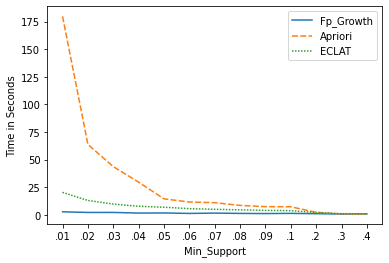

In [144]:
g = sns.lineplot(data=df)
g.set_xticks(range(len(df))) # <--- set the ticks first
g.set_xticklabels(['.01','.02', '.03','.04','.05','.06', '.07','.08','.09', '.1', '.2','.3','.4', '.5', '.6'])
g.set(xlabel='Min_Support', ylabel='Time in Seconds')
plt.savefig(data+"_"+"Run time performance.png")

Plotting number of itemset per support

In [147]:
adult_no = [248696
,86730
,44374
,26704
,17739
,12818
,9539
,7246
,5640
,4575
,937
,70
,37]

In [148]:
df_itemset = pd.DataFrame({'No': adult_no })

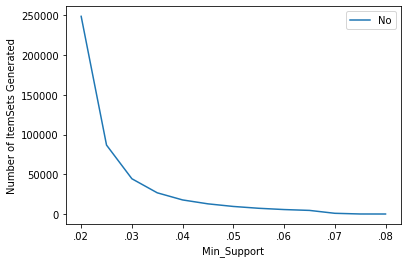

In [150]:
g = sns.lineplot(data=df_itemset)
#g.set_xticks(range(len(df_itemset))) # <--- set the ticks first
g.set_xticklabels(['.01','.02', '.03','.04','.05','.06', '.07','.08','.09', '.1', '.2','.3','.4', '.5', '.6'])
g.set(xlabel='Min_Support', ylabel='Number of ItemSets Generated')
plt.savefig(data+"_"+"MinSupportVsNoOfItemsets.png")